<a href="https://colab.research.google.com/github/jingyi0936/PyEMD-Example/blob/main/eemd_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEMD Analysis Example 
[PyEMD](https://pyemd.readthedocs.io/en/latest/) : documentation of PyEMD
    
 *超链接是PyEMD的索引*

In [ ]:
pip install EMD-signal

In [2]:
from PyEMD import EEMD
import numpy as np
import pandas as pd
import pylab as plt

## Define s reprenting signal and t representing time

In [5]:
# Define signal 定义信号
s = pd.read_csv('data2.csv') # csv file should have only one column
# You can choose header to be T/F
# s is now stored in a Pandas Dataframe
s = s.to_numpy() # convert the data frame to a numpy array
s = np.concatenate(s) # concatenate s to ensure the shape of s and t being the same

In [6]:
t = np.linspace(0, 1, len(s)) # length of s and t should be the same

## Execute EEMD on signal
执行EEMD算法




In [30]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection = "parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(s, t, max_imf = 5) # add restriction on numbers of IMFs
nIMFs = eIMFs.shape[0] # number of IMFs is max_imf + 1, since IMF starts from 0

In [31]:
# Get the shape of IMF calculated
eIMFs.shape

(6, 10052)

In [36]:
rt = eemd.get_imfs_and_residue()[1] # get the residue
imf = eemd.get_imfs_and_residue()[0] # get the first imf
imf

array([[ 3.60442129e+00, -1.97855052e+00, -4.83400310e+00, ...,
        -1.88194166e+01,  1.22001246e+01, -1.26911988e+00],
       [ 3.18322930e+00, -9.53342232e-01, -8.05379967e+00, ...,
         3.12250276e+00,  9.61155821e+00,  7.69822102e+00],
       [ 4.80226364e+00,  4.84654310e+00,  2.52883577e+00, ...,
        -2.01841782e+00, -9.55622266e-01,  1.21606678e-01],
       [ 4.71248178e-01, -4.13725962e-01, -1.05616357e+00, ...,
        -9.89073684e+00, -1.09064103e+01, -1.12268865e+01],
       [ 9.18568365e-01,  8.21592408e-01,  7.14227931e-01, ...,
         4.10913286e+00,  4.10181870e+00,  4.16830959e+00],
       [ 3.69464715e+03,  3.69478690e+03,  3.69492897e+03, ...,
         4.25385633e+03,  4.25399886e+03,  4.25414218e+03]])

In [28]:
std_rt = np.std(rt)
R = np.log(np.std(s - rt) / std_rt) 
R

2.961034387593644

## Plots of Each IMF in one figure

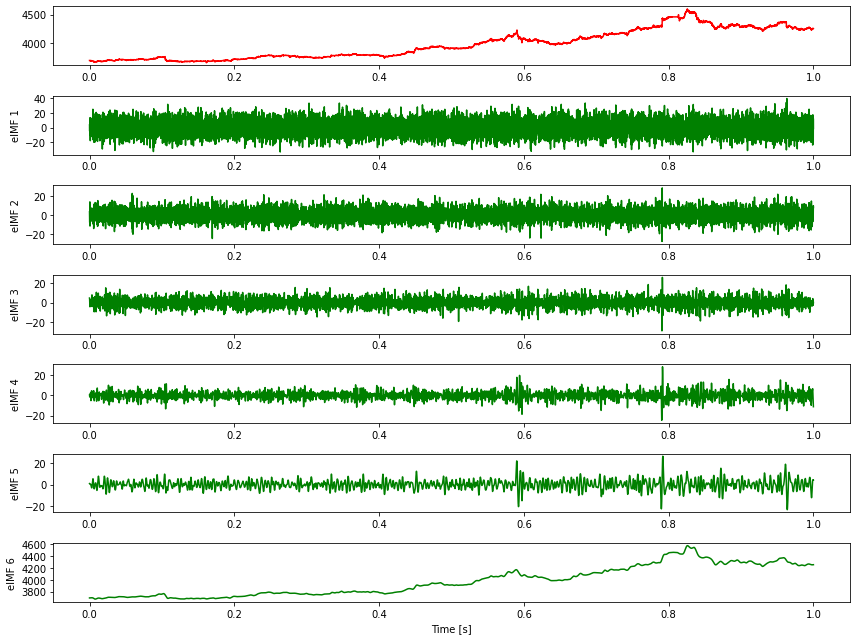

In [32]:
# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()